<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear</a></span><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Função-Custo-Regularizada" data-toc-modified-id="Função-Custo-Regularizada-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Função Custo Regularizada</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Custo-e-Regularização" data-toc-modified-id="Custo-e-Regularização-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Custo e Regularização</a></span></li><li><span><a href="#Gradiente-e-Regularização" data-toc-modified-id="Gradiente-e-Regularização-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Gradiente e Regularização</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Visualizando-Treinamento" data-toc-modified-id="Visualizando-Treinamento-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Visualizando Treinamento</a></span></li></ul></li><li><span><a href="#Curvas-de-Aprendizado" data-toc-modified-id="Curvas-de-Aprendizado-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Curvas de Aprendizado</a></span></li></ul></li><li><span><a href="#Regressão-Polinomial" data-toc-modified-id="Regressão-Polinomial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regressão Polinomial</a></span><ul class="toc-item"><li><span><a href="#Normalização" data-toc-modified-id="Normalização-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Normalização</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Curva-de-Aprendizado" data-toc-modified-id="Curva-de-Aprendizado-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Curva de Aprendizado</a></span></li><li><span><a href="#Alterando-Lambda" data-toc-modified-id="Alterando-Lambda-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Alterando Lambda</a></span><ul class="toc-item"><li><span><a href="#Lambda-=-1" data-toc-modified-id="Lambda-=-1-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Lambda = 1</a></span></li><li><span><a href="#Lambda-=-100" data-toc-modified-id="Lambda-=-100-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Lambda = 100</a></span></li><li><span><a href="#Melhor-Lambda" data-toc-modified-id="Melhor-Lambda-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Melhor Lambda</a></span></li></ul></li></ul></li></ul></div>

Este notebook tem por objetivo a implementação de um modelo de ```Regressão Linear Regularizada``` para estudar os efeitos das propriedades ```viés-variância``` nos algoritmos. Na primeira metade do exercício, será proposto o desenvolvimento de um modelo para predição da vazão de água através de uma torneira de acordo com o nível de água presente em um reservatório. Já na segunda metade, vamos avaliar alguns diagnósticos e examinar os efeitos de viés-variância no modelo.

## Regressão Linear

### Lendo os Dados

In [1]:
# Importando bibliotecas
import numpy as np
import scipy.io as sio

A partir da leitura do arquivo contendo os dados, é esperado receber:

    - Um set de treino (X, y);
    - Um set de validação cruzada (X_val, y_val);
    - Um set treino (X_test, y_test).

In [2]:
# Lendo os dados
data = sio.loadmat('ex5data1.mat')

In [3]:
# Visualizando o conteúdo importado
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [4]:
# Visualizando de forma mais dinâmica
print(f'Chaves do arquivo importado: {list(data.keys())[3:]}')

Chaves do arquivo importado: ['X', 'y', 'Xtest', 'ytest', 'Xval', 'yval']


In [5]:
# Separando conjuntos de Treino
X_train = data['X']
y_train = data['y']

# Separando conjuntos de Validação
X_val = data['Xval']
y_val = data['yval']

# Separando conjuntos de Teste
X_test = data['Xtest']
y_test = data['ytest']

In [6]:
# Verificando dimensões
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_val: {X_val.shape}')
print(f'Dimensões de X_test: {X_test.shape}')

Dimensões de X_train: (12, 1)
Dimensões de X_val: (21, 1)
Dimensões de X_test: (21, 1)


Temos em mãos um conjunto de dados com pouquíssimos dados. Acredito que não será possível aplicar com eficiência treinamentos a partir do Scikit-Learn. Será apenas um desenvolvimento didático.

Um outro ponto a ser destacado é que, de certa forma, não faz nenhum sentido o conjunto de treino possuir praticamente a metade da quantidade de dados dos conjuntos de validação e de teste. Isto não é, nem de longe, aplicável em problemas reais.

In [7]:
# Vamos verificar as primeiras linhas dos dados de treino
X_train[:5]

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945]])

Lembrando que:
    - Eixo x (feature): mudança no nível de água no reservatório
    - Eixo y (label): fluxo de água saindo da torneira

In [8]:
# Vejamos o label
y_train[:5]

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507]])

In [9]:
# Vamos alterar o label y para critérios de otimização futuros
print(f'Dimensões de y_train antes do reshape: {y_train.shape}')
y_train = y_train.reshape(-1)

print(f'Dimensões de y_train após o reshape: {y_train.shape}')
print(f'\nPrimeiras linhas de y_train: \n{y_train[:5]}')

Dimensões de y_train antes do reshape: (12, 1)
Dimensões de y_train após o reshape: (12,)

Primeiras linhas de y_train: 
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507]


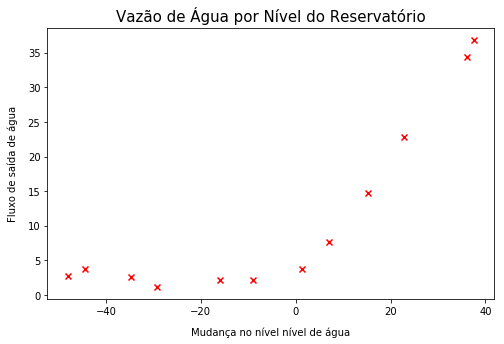

In [10]:
# Vamos plotar os dados
import matplotlib.pyplot as plt
%matplotlib inline

# Criando figure e eixo
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_train, y_train, marker='x', color='r')
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)
plt.show()

Através da plotagem, é possível perceber que o comportamento do modelo não pode ser linear, visto que os dados possem um comportamento exponencial (ou de graus polinomiais maiores) a medida que o mudança no nível de água do reservatório aumenta.

Para dar início ao desenvolvimento, vamos calcular a função custo considerando um modelo linear simples!

### Função Custo Regularizada

Em um primeiro momento, vamos considerar um modelo totalmente linear (grau polinomial = 1) apenas para definir uma função custo para os testes posteriores.

Fórmula:

\begin{equation*}
    J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2\right)+
              \frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_j^2\right)
\end{equation*}

Considerações:
    - lambda ALTO = tendência a UNDERFITTING
    - lambda BAIXO = tendência a OVERFITTING

#### Hypothesis

In [11]:
# Inicializando parâmetros de teste
theta_inicial = np.array((1, 1)).reshape(2, 1)
theta_inicial

array([[1],
       [1]])

Para iniciarmos os cálculos da função custo, precisamos, primeiro calcular a função ```hypothesis``` para Regressão Linear

\begin{equation*}
    h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n
\end{equation*}

In [12]:
# Adicionando termo de bias em X
m = X_train.shape[0]
X_train = np.c_[(np.ones((m, 1)), X_train)]

# Verificnado
print(f'Dimensões de X_train: {X_train.shape}')
print(f'\nPrimeiras linhas de X_train: \n{X_train[:5]}')

Dimensões de X_train: (12, 2)

Primeiras linhas de X_train: 
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]]


In [13]:
# Verificando dimensão dos parâmetros
theta_inicial.shape

(2, 1)

Uma multiplicação de matriz com dimensões 12x2 por 2x1 resultará em h = 12x1, que é o que queremos!

In [14]:
# Calculando hypothesis
h = X_train.dot(theta_inicial)

# Verificando primeiras linhas
print(f'Primeiras linhas de h: \n{h[:5]}')

Primeiras linhas de h: 
[[-14.93675813]
 [-28.15297922]
 [ 37.18954863]
 [ 38.49218733]
 [-47.05882945]]


In [15]:
# Comparando com y (target)
print(f'Primeiras linhas de y_train: \n{y_train[:5]}')

Primeiras linhas de y_train: 
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507]


In [16]:
# Definindo função para cálculo da função hypothesis
def hypothesis(theta, X):
    """ Função responsável por cálcular a função hypothesis do modelo (predições)
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
    Output:
        h: função hypothesis (predições)"""
    
    h = X.dot(theta)
    return h   

In [17]:
# Testando mais uma vez
h = hypothesis(theta_inicial, X_train)
h[:5]

array([[-14.93675813],
       [-28.15297922],
       [ 37.18954863],
       [ 38.49218733],
       [-47.05882945]])

Obviamente temos uma grande diferença. Primeiro, porque os parâmetros foram iniciados em [1; 1] e, fatalmente esta está longe da combinação perfeita de parâmetros. Segundo, porque já vimos que o modelo linear (grau = 1) não se encaixa nos dados. Matematicamente, podemos provar esse "erro" através da função custo (esperamos obter um valor elevado pro custo).

#### Custo e Regularização

\begin{equation*}
    J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2\right)+
              \frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_j^2\right)
\end{equation*}

In [18]:
# Subtração
y_reshaped = y_train.reshape(-1, 1)
h - y_reshaped

array([[-17.07106864],
       [-29.3262359 ],
       [  2.83043945],
       [  1.65423217],
       [-49.86779453],
       [-10.06253041],
       [  1.59752458],
       [-36.3204502 ],
       [ -1.3510173 ],
       [-47.11545116],
       [  0.38584323],
       [  1.01032062]])

In [19]:
# Elevando ao quadrado
(h - y_reshaped) ** 2

array([[2.91421385e+02],
       [8.60028112e+02],
       [8.01138746e+00],
       [2.73648407e+00],
       [2.48679693e+03],
       [1.01254518e+02],
       [2.55208479e+00],
       [1.31917510e+03],
       [1.82524774e+00],
       [2.21986574e+03],
       [1.48874998e-01],
       [1.02074775e+00]])

In [20]:
# Somando
sum((h - y_reshaped) ** 2)

array([7294.83661329])

In [21]:
# Dividindo por 2m
sum((h - y_reshaped) ** 2) / (2*m)

array([303.95152555])

In [22]:
# Regularização
lamda = 1
(lamda / (2 * m)) * theta_inicial.T.dot(theta_inicial)

array([[0.08333333]])

In [23]:
# Definindo função custo
def linRegCostFunction(theta, X, y, lamda):
    """ Função responsável por calcular a Função Custo de um problema de Regressão Linear
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
        y: labels do modelo;
        lamda: fator de regularização"""
    
    # Preparando cálculo
    theta = theta.reshape(X.shape[1], 1)
    m = X.shape[0]
    y_reshaped = y.reshape(-1, 1)
    
    # Calculando J sem regularização
    term1 = X.dot(theta) - y_reshaped
    unreg = term1.T.dot(term1) / (2 * m)
    
    # Calculando fator de regularização
    reg = (lamda / (2 * m)) * theta[1:].T.dot(theta[1:])
    
    # Unindo termos
    J = (unreg + reg).flatten()[0]
    
    return J

In [24]:
# Testando sem regularização (resultado esperado = 303.95)
J = linRegCostFunction(theta_inicial, X_train, y_train, 0)
print(f'Custo da função com lambda = 0: {J}')

Custo da função com lambda = 0: 303.9515255535976


#### Gradiente e Regularização

\begin{equation*}
    \frac{\partial J(\theta)}{\partial\theta_j} = 
        \begin{cases} 
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)
                & \mbox{para } j\mbox{ = 0} \\
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right) +
            \frac{\lambda}{m}\theta_j &\mbox{para } j\mbox{ >= 1}
        \end{cases}
\end{equation*}  

Como podemos ver, o termo 0 dos parâmetros theta ```não é regularizado!``` Dessa forma, vamos calcular o gradiente geral sem o fator de regularização e, posteriormente, vamos indexar nosso vetor de gradiente para aplicar o termo de regularização em todos os registros, exceto o primeiro.

In [25]:
# Testando grad
h = hypothesis(theta_inicial, X_train)
m = X_train.shape[0]
grad = X_train.T.dot((h - y_reshaped)) / m

# Verificando
grad

array([[-15.30301567],
       [598.16741084]])

Bom, pelo menos as dimensões obtidas foram de acordo com o esperado. Temos duas features em nosso modelo (bias e x1) e, por consequência, precisamos de uma parametrização theta de 2 colunas (theta0 e theta1). O gradiente descendente, por sua vez, é uma medida que reflete a magnitude da correção em nossos parâmetros theta e, por tanto, também deve possuir dimensões semelhantes à da matriz theta.

In [26]:
# Aplicando regularização
lamda = 0
grad[1:] = grad[1:] + (lamda/m) * theta_inicial[1:]

# Verificando
grad

array([[-15.30301567],
       [598.16741084]])

Claro que não houve alteração pelo fato de termos testado com lamda = 0

In [27]:
# Testando para lamda = 1
lamda = 1
grad[1:] = grad[1:] + (lamda/m) * theta_inicial[1:]

# Verificando
grad

array([[-15.30301567],
       [598.25074417]])

Houve uma mudança de magnitude decimal.

In [28]:
# Definindo função
def gradientDescent(theta, X, y, lamda):
    """ Função responsável pelo cálculo do vetor de gradiente relacionado aos parâmetros theta
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
        y: label do modelo;
        lamda: fator de regularização
    Output:
        grad: vetor de gradiente"""
    
    # Preparando cálculo
    theta = theta.reshape(X.shape[1], 1)
    m = X.shape[0]
    y_reshaped = y.reshape(-1, 1)
    
    # Gradiente sem regularização
    term1 = X.dot(theta) - y_reshaped
    grad = X.T.dot(term1) / m
    
    # Aplicando regularização
    grad[1:] = grad[1:] + (lamda / m) * theta[1:]
    
    return grad.flatten()

In [29]:
# Executando
grad = gradientDescent(theta_inicial, X_train, y_train, 0)
print(f'Vetor de gradiente: \n{grad}')

Vetor de gradiente: 
[-15.30301567 598.16741084]


Os valores obtidos foram de acordo com o esperado.

#### Treinando Modelo

Para realizar o treinamento do modelo, vamos seguir de acordo com o que já foi realizado até o momento, em outros exercício: minimização da função custo através de módulos específicos do scipy (optimize.fmin_cg).

In [30]:
# Importando módulos
import scipy.optimize

In [31]:
# Verificando
help(scipy.optimize.fmin_cg)

Help on function fmin_cg in module scipy.optimize.optimize:

fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using a nonlinear conjugate gradient algorithm.
    
    Parameters
    ----------
    f : callable, ``f(x, *args)``
        Objective function to be minimized.  Here `x` must be a 1-D array of
        the variables that are to be changed in the search for a minimum, and
        `args` are the other (fixed) parameters of `f`.
    x0 : ndarray
        A user-supplied initial estimate of `xopt`, the optimal value of `x`.
        It must be a 1-D array of values.
    fprime : callable, ``fprime(x, *args)``, optional
        A function that returns the gradient of `f` at `x`. Here `x` and `args`
        are as described above for `f`. The returned value must be a 1-D array.
        Defaults to None, in which case the gradient is approximated
        numeri

In [32]:
# Minimizando função custo
lamda = 0
result = scipy.optimize.fmin_cg(linRegCostFunction, fprime=gradientDescent, 
                                x0=theta_inicial, args=(X_train, y_train, lamda), 
                                maxiter=200, disp=True, full_output=True)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


In [33]:
# Verificando vetor de resultados
result

(array([13.08790734,  0.36777925]), 22.37390649511602, 28, 28, 0)

In [34]:
# Parâmetros
best_theta = result[0]
print(f'Melhores parâmetros para o modelo: {best_theta}')

# Custo
J_min = result[1]
print(f'Menor custo para o modelo: {J_min:.3f}')

Melhores parâmetros para o modelo: [13.08790734  0.36777925]
Menor custo para o modelo: 22.374


O valor mínimo para o custo foi obtido de acordo com o esperado para este exerício.

In [35]:
# Definindo função para o treinamento
def trainLinReg(theta_inicial, X, y, lamda):
    """ Função responsável por realizar o treinamento do modelo de Regressão Linear através
    da minimização da função custo já definida
    Input:
        theta_inicial: parâmetros de entrada do modelo;
        X: features do modelo;
        y: label do modelo;
        lamda: fator de regularização
    Output:
        best_theta: melhores parâmetro aprendidos
        J_min: menor custo para o modelo"""
    
    result = scipy.optimize.fmin_cg(linRegCostFunction, fprime=gradientDescent, 
                                x0=theta_inicial, args=(X, y, lamda), 
                                maxiter=1000, disp=True, full_output=True)
    best_theta = result[0]
    J_min = result[1]
    
    return best_theta, J_min

In [36]:
# Verificando (dados de treino)
best_theta, J_min = trainLinReg(theta_inicial, X_train, y_train, 0)
print(f'\nMelhores parâmetros para o modelo: {best_theta}')
print(f'Menor custo para o modelo: {J_min:.3f}')

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28

Melhores parâmetros para o modelo: [13.08790734  0.36777925]
Menor custo para o modelo: 22.374


#### Visualizando Treinamento

Bom, já sabemos que uma reta não irá descrever bem os nossos dados. Mas, apenas para transpor essa afirmação em um caráter gráfico, vamos plotar a melhor reta obtida com a minimização da função custo dentro dos nossos dados já plotados.

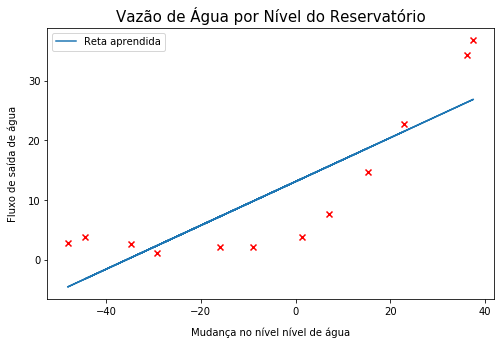

In [37]:
# Criando figure e eixo
fig, ax = plt.subplots(figsize=(8, 5))

# Configurando plotagem dos dados
ax.scatter(X_train[:, 1:], y_train, marker='x', color='r')
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)

# Configurando plotagem da curva aprendida
ax.plot(X_train[:, 1:], X_train.dot(best_theta), label='Reta aprendida')

plt.legend()
plt.show()

Conclusão: *o modelo sofre de **bias (viés)** alto!*

### Curvas de Aprendizado

Um conceito muito importante para a avaliação de modelos é a relação ```viés-variância```. Se por um lado, um modelo com alto ```viés``` tende a sofrer de ```underfitting```, por outro, um modelo com alta ```variância``` está sujeito a ```overfitting```.

Para analisar essa relação, é possível plotar curvas de aprendizado para mostrar as consequências do treinamento de acordo com a ```quantidade``` dos dados utilizados.

In [38]:
# Levantando dados
error_train = []
error_cv = []
lamda = 0
m = X_train.shape[0]

# Adicionando bias em X_val
mval = X_val.shape[0]
X_val = np.c_[(np.ones((mval, 1)), X_val)]

# Redimensionando y_val e y_train
y_val = y_val.reshape(-1, 1)

In [39]:
# Laço para montar curvas
error_train = []
error_cv = []
for i in range(1, m+1):
    # Retornando os melhores parâmetros de acordo com m
    y_train_reshaped = y_train.reshape(-1)
    theta_learned, J_min_train = trainLinReg(theta_inicial, 
                                                   X_train[:i], y_train_reshaped[:i], lamda)
    
    # Retornando o custo com os parâmetros aprendidos
    J_val = linRegCostFunction(theta_learned.reshape(2, 1), X_val, 
                               y_val, lamda)
    error_train.append(J_min_train)
    error_cv.append(J_val)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 4
         Function evaluations: 8
         Gradi

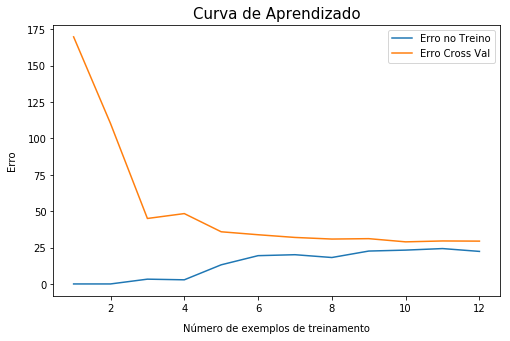

In [40]:
# Plotando dados
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.arange(m)+1, error_train, label='Erro no Treino')
ax.plot(np.arange(m)+1, error_cv, label='Erro Cross Val')
ax.set_title('Curva de Aprendizado', size=15)
ax.set_xlabel('Número de exemplos de treinamento', size=10, labelpad=10)
ax.set_ylabel('Erro', size=10, labelpad=10)
plt.legend()
plt.show()

**Análise do Gráfico**

Com o aumento do número ```m``` de exemplos utilizados no cálculo dos erros, é possível perceber que tanto o custo de treinamento quanto o custo de validação ficam com valores próximos um do outro. Isto indica que o modelo sofre de um **ALTO VIÉS** e que o aumento do número ```m``` de exemplo **NÃO** resolve a situação, mas sim:
    - Considerar mais features para o modelo;
    - Aumentar o grau polinomial do modelo;
    - Diminuir o parâmetro de regularização.

In [89]:
# Definindo função para plotar curva de aprendizado
def plotLearningCurve(X_train, y_train, X_val, y_val, lamda):
    
    # Inicializando variáveis
    error_train = []
    error_cv = []
    m, n = X_train.shape
    theta_inicial = np.ones((n, 1))
    
    # Laço para montar curvas
    for i in range(1, m+1):
        # Retornando os melhores parâmetros de acordo com m
        theta_learned, J_min_train = trainLinReg(theta_inicial, 
                                                       X_train[:i], y_train[:i], lamda)

        # Retornando o custo com os parâmetros aprendidos
        J_train = linRegCostFunction(theta_learned.reshape(n, 1), X_train[:i], 
                                    y_train[:i], 0)
        J_val = linRegCostFunction(theta_learned.reshape(n, 1), X_val, 
                                   y_val, 0)
        error_train.append(J_train)
        error_cv.append(J_val)
    
    # Plotando dados
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(np.arange(m)+1, error_train, label='Erro no Treino')
    ax.plot(np.arange(m)+1, error_cv, label='Erro Cross Val')
    ax.set_title('Curva de Aprendizado', size=15)
    ax.set_xlabel('Número de exemplos de treinamento', size=10, labelpad=10)
    ax.set_ylabel('Erro', size=10, labelpad=10)
    plt.legend()
    plt.show()
    
    return error_train, error_cv

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 4
         Function evaluations: 8
         Gradi

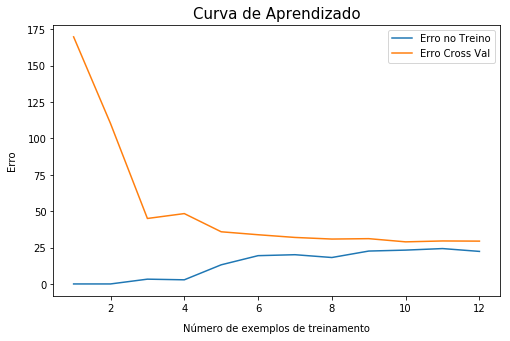

In [90]:
# Testando
error_train, error_cv = plotLearningCurve(X_train, y_train, X_val, y_val, 0)

## Regressão Polinomial

De acordo com as conclusões tiradas através da Curva de Aprendizado do modelo de Regressão Linear, vamos aplicar um método difente para a resolução do problema de vazão de água através do nível do reservatório.

Vamos mepear as features e elevar o grau polinomial do modelo até ```8```!

In [43]:
# Importando biblioteca e mapeando features
from sklearn.preprocessing import PolynomialFeatures

# Expandindo até a oitava potência
poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X_train)

# Verificando dimensões
X_poly.shape

(12, 45)

In [44]:
# Exemplo de registro
X_poly[0]

array([ 1.00000000e+00,  1.00000000e+00, -1.59367581e+01,  1.00000000e+00,
       -1.59367581e+01,  2.53980260e+02,  1.00000000e+00, -1.59367581e+01,
        2.53980260e+02, -4.04762197e+03,  1.00000000e+00, -1.59367581e+01,
        2.53980260e+02, -4.04762197e+03,  6.45059724e+04,  1.00000000e+00,
       -1.59367581e+01,  2.53980260e+02, -4.04762197e+03,  6.45059724e+04,
       -1.02801608e+06,  1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
       -4.04762197e+03,  6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        1.00000000e+00, -1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
        6.45059724e+04, -1.02801608e+06,  1.63832436e+07, -2.61095791e+08,
        1.00000000e+00, -1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
        6.45059724e+04, -1.02801608e+06,  1.63832436e+07, -2.61095791e+08,
        4.16102047e+09])

Uma observação importante: não seria mais adequado realizar o mapeamento das features em um dataset sem a coluna de bias? Digo isso pelo fato de terem surgido colunas de "ums" adicionais. Vamos testar.

In [45]:
# Testando novo mapeamento
X_sem_bias = X_train[:, 1:]

# Novo mapeamento
X_poly = poly.fit_transform(X_sem_bias)

# Verificando dimensões
print(f'Dimensões de X_poly: {X_poly.shape}')
print(f'\nPrimeira linha de X_poly: \n{X_poly[0]}')

Dimensões de X_poly: (12, 9)

Primeira linha de X_poly: 
[ 1.00000000e+00 -1.59367581e+01  2.53980260e+02 -4.04762197e+03
  6.45059724e+04 -1.02801608e+06  1.63832436e+07 -2.61095791e+08
  4.16102047e+09]


Perfeito! Vamos agora verificar o custo do modelo com esse novo set de features!

In [46]:
# Inicializando parâmetros
m, n = X_poly.shape
theta_inicial_poly = np.ones((n, 1))

# Verificando custo
J = linRegCostFunction(theta_inicial_poly, X_poly, y_train.reshape(-1, 1), lamda)

# Verificando
print(f'Custo com inicialização padrão de parâmetro e features polinomiais: {J}')

Custo com inicialização padrão de parâmetro e features polinomiais: 4.265369400507468e+25


Um custo absurdo!

A primeira ação a ser tomada leva em consideração a escala das features mapeadas. Como fizemos um processo artificial de aumento de grau polinomial, temos features com uma magnitude baixa e features com magnitudes elevadas. Vejamos:

In [47]:
# Diferença
print(f'Feature x1: {X_poly[0][1]}')
print(f'Feature x8: {X_poly[0][8]}')

Feature x1: -15.93675813378541
Feature x8: 4161020472.1191983


Para evitar esse tipo de situação, vamos aplicar o processo de normalização!

### Normalização

In [48]:
# Modificando matriz para normaliza
X_poly = X_poly[:, 1:]
mu = np.mean(X_poly, axis=0)
sigma = np.std(X_poly, axis=0)

print(f'Vetor de médias: \n{mu}')
print(f'\nVetor de desvios: \n{sigma}')

Vetor de médias: 
[-5.08542635e+00  8.48904834e+02 -1.28290173e+04  1.28967789e+06
 -2.98314592e+07  2.29330301e+09 -6.84527284e+10  4.42233759e+12]

Vetor de desvios: 
[2.86887308e+01 7.54346385e+02 4.61380464e+04 1.66104441e+06
 8.99399404e+07 3.68940106e+09 1.89508052e+11 8.31905350e+12]


In [49]:
# Aplicando normalização
X_poly_normalized = (X_poly - mu) / sigma

# Verificando
X_poly_normalized[0]

array([-0.3782437 , -0.78866232,  0.19032872, -0.7375913 ,  0.32025197,
       -0.6171516 ,  0.35983501, -0.53109126])

In [50]:
# Adicionando termo bias
m, n = X_poly_normalized.shape
X_poly_normalized = np.c_[(np.ones((m, 1)), X_poly_normalized)]

# Verificando
print(f'Dimensões: {X_poly_normalized.shape}')

Dimensões: (12, 9)


In [51]:
# Exemplo
X_poly_normalized[0]

array([ 1.        , -0.3782437 , -0.78866232,  0.19032872, -0.7375913 ,
        0.32025197, -0.6171516 ,  0.35983501, -0.53109126])

In [52]:
# Definindo função para feature mapping
def featureMapping(X, grau):
    """ Função responsável por receber um conjunto de dados X e realizar o procedimento de
    feature mapping, mepeando as features de acordo com um grau polinomial parametrizado
    Input:
        X: conjunto de dados (features)
        grau: grau polinomial
    Output:
        X_poly: novo conjunto de dados após procedimento"""
    
    poly = PolynomialFeatures(grau)
    return poly.fit_transform(X)

In [53]:
# Definindo função para normalização
def featureNormalize(X):
    """ Função responsável por aplicar o procedimento de normalização no conjunto de dados
    Input:
        X: conjunto de dados (features)
    Output:
        X_normalized: conjunto de dados normalizado"""
    
    # Realizando cálculos
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    return (X - mu) / sigma

In [54]:
# Testando desde o início
X_sem_bias = X_train[:, 1:]
X_sem_bias[:5]

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945]])

In [55]:
# Mapeando features e normalizando
X_poly = featureMapping(X_sem_bias, 8)[:, 1:]
X_poly_normalized = featureNormalize(X_poly)

# Adicionando bias
m = X_poly_normalized.shape[0]
X_poly_normalized = np.c_[(np.ones((m, 1)), X_poly_normalized)]

In [56]:
# Verificnado
print(f'Dimensões: {X_poly_normalized.shape}')
print(f'\nExemplo: \n{X_poly_normalized[0]}')

Dimensões: (12, 9)

Exemplo: 
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


### Treinando Modelo

In [57]:
# Inicializando parâmetros
m, n = X_poly_normalized.shape
theta_inicial_poly = np.ones((n, 1))
lamda = 0

best_theta_poly, J_min_poly = trainLinReg(theta_inicial_poly, 
                                          X_poly_normalized, y_train, lamda)

         Current function value: 0.028892
         Iterations: 1000
         Function evaluations: 1931
         Gradient evaluations: 1931


In [58]:
# Verificando dados utilizados
print(f'Dimensões: {X_poly_normalized.shape}')
print(f'\nPrimeira linha: \n{X_poly_normalized[0]}')

print(f'\nParâmetros: {theta_inicial_poly}')

print(f'\nLabel: \n{y_train}')

Dimensões: (12, 9)

Primeira linha: 
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]

Parâmetros: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

Label: 
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507  2.12107248
 14.71026831  2.61418439  3.74017167  3.73169131  7.62765885 22.7524283 ]


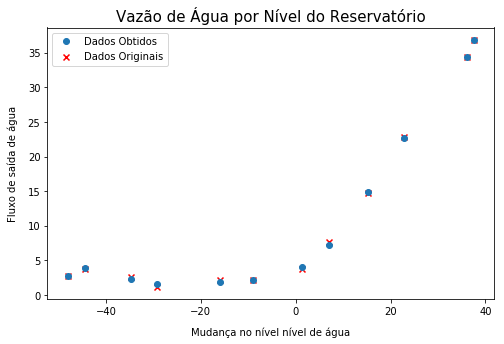

In [59]:
# Plotando dados
fig, ax = plt.subplots(figsize=(8, 5))

# Plotando dataset original
ax.scatter(X_train[:, 1:], y_train, marker='x', color='r', label='Dados Originais')

# Plotando dados obtidos (scatter)
ax.plot(X_train[:, 1:], X_poly_normalized.dot(best_theta_poly), 'o', label='Dados Obtidos')

# Configurando plotagem
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)
plt.legend()
plt.show()

In [60]:
# Preparando plot com linhas ao invés de pontos
y = X_poly_normalized.dot(best_theta_poly).reshape(-1, 1)
y

array([[ 1.86987202],
       [ 1.55764611],
       [34.33984108],
       [36.85366585],
       [ 2.76589854],
       [ 2.18915164],
       [14.8761716 ],
       [ 2.29035126],
       [ 4.10457823],
       [ 3.84448885],
       [ 7.1916425 ],
       [22.72771036]])

In [61]:
# Preparando eixo x
x = X_train[:, 1:]
x

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [62]:
# Juntando eixos
xy = np.c_[(x, y)]
xy

array([[-15.93675813,   1.86987202],
       [-29.15297922,   1.55764611],
       [ 36.18954863,  34.33984108],
       [ 37.49218733,  36.85366585],
       [-48.05882945,   2.76589854],
       [ -8.94145794,   2.18915164],
       [ 15.30779289,  14.8761716 ],
       [-34.70626581,   2.29035126],
       [  1.38915437,   4.10457823],
       [-44.38375985,   3.84448885],
       [  7.01350208,   7.1916425 ],
       [ 22.76274892,  22.72771036]])

In [63]:
# Ordenando pelo eixo x
xy_sorted = xy[xy[:, 0].argsort()]
xy_sorted

array([[-48.05882945,   2.76589854],
       [-44.38375985,   3.84448885],
       [-34.70626581,   2.29035126],
       [-29.15297922,   1.55764611],
       [-15.93675813,   1.86987202],
       [ -8.94145794,   2.18915164],
       [  1.38915437,   4.10457823],
       [  7.01350208,   7.1916425 ],
       [ 15.30779289,  14.8761716 ],
       [ 22.76274892,  22.72771036],
       [ 36.18954863,  34.33984108],
       [ 37.49218733,  36.85366585]])

In [64]:
# Separando
X_sorted = xy_sorted[:, 0]
y_pred = xy_sorted[:, 1]

print(f'Verificando X_sorted: \n{X_sorted}')

print(f'\nVerificando y_pred: \n{y_pred}')

Verificando X_sorted: 
[-48.05882945 -44.38375985 -34.70626581 -29.15297922 -15.93675813
  -8.94145794   1.38915437   7.01350208  15.30779289  22.76274892
  36.18954863  37.49218733]

Verificando y_pred: 
[ 2.76589854  3.84448885  2.29035126  1.55764611  1.86987202  2.18915164
  4.10457823  7.1916425  14.8761716  22.72771036 34.33984108 36.85366585]


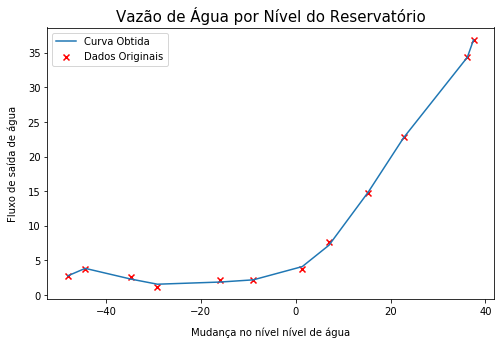

In [65]:
# Plotando dados
fig, ax = plt.subplots(figsize=(8, 5))

# Plotando dataset original
ax.scatter(X_train[:, 1:], y_train, marker='x', color='r', label='Dados Originais')

# Plotando dados obtidos (scatter)
ax.plot(X_sorted, y_pred, label='Curva Obtida')

# Configurando plotagem
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)
plt.legend()
plt.show()

Após a análise do gráfico acima, é possível concluir, em um primeiro um momento, que o mapeamento das features e a elevação do grau polinomial do modelo atuaram diretamente na performance do mesmo nos dados de teste. Percebe-se que a curva definida pelo modelo, definida por uma função de oitavo grau polinomial, está disposta bem próxima dos pontos originais descritos pelos dados de treino.

Entretanto, não é possível propor uma plena satisfação com este resultado, visto que, essa semelhança entre os dados preditos e os dados de treino pode indicar um problema de overfitting no modelo. Em outras palavras, como foram obtidos resultados muito próximos do que se tem por treinamento, é possível afirmar que o modelo não possui um alto grau de generalização, apresentando possíveis falhas ao ser contraposto a dados não presentes nos dados de treino. Para avaliar melhor tal situação, é apresentada a curva de aprendizado do modelo, indicando o erro progressivo do mesmo no conjunto de treino e no conjunto de validação.

In [66]:
# Definindo função para plotagem da curva
def plotCurve(theta, X_train, y_train, X=X_train):
    """ Função responsável pela plotagem da curva aprendida pelo modelo
    Input:
        theta: parâmetros aprendidos pelo modelo
        X_train: dados de treinamento (features)
        y_train: label"""
    
    # Calculando eixo y e retirando termo bias de X
    y = X.dot(theta).reshape(-1, 1)
    x = X_train[:, 1:]
    
    # Juntando eixos
    xy = np.c_[(x, y)]
    
    # Ordenando pelo eixo x
    xy_sorted = xy[xy[:, 0].argsort()]
    
    # Separando
    X_sorted = xy_sorted[:, 0]
    y_pred = xy_sorted[:, 1]
    
    # Plotando dados
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plotando dataset original
    ax.scatter(X_train[:, 1:], y_train, marker='x', color='r', label='Dados Originais')

    # Plotando dados obtidos (scatter)
    ax.plot(X_sorted, y_pred, label='Curva Obtida')

    # Configurando plotagem
    ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
    ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
    ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)
    plt.legend()
    plt.show()

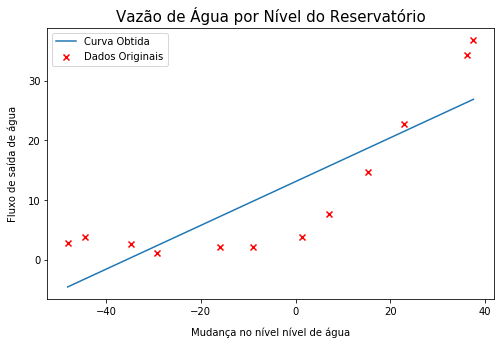

In [67]:
# Testando para grau = 1
plotCurve(best_theta, X_train, y_train)

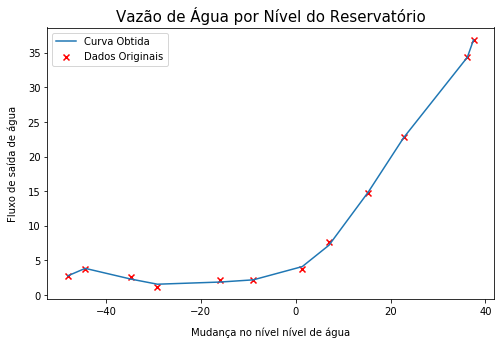

In [68]:
# Testando para grau = 8
plotCurve(best_theta_poly, X_train, y_train, X=X_poly_normalized)

### Curva de Aprendizado

Antes de plotarmos a curva de aprendizado, precisamos realizar o mesmo procedimento feito em ```X_train``` para aumento de grau polinomial e normalização, em ```X_val```.

In [69]:
help(featureMapping)

Help on function featureMapping in module __main__:

featureMapping(X, grau)
    Função responsável por receber um conjunto de dados X e realizar o procedimento de
    feature mapping, mepeando as features de acordo com um grau polinomial parametrizado
    Input:
        X: conjunto de dados (features)
        grau: grau polinomial
    Output:
        X_poly: novo conjunto de dados após procedimento



In [70]:
help(featureNormalize)

Help on function featureNormalize in module __main__:

featureNormalize(X)
    Função responsável por aplicar o procedimento de normalização no conjunto de dados
    Input:
        X: conjunto de dados (features)
    Output:
        X_normalized: conjunto de dados normalizado



In [71]:
# Aplicando para dados de treino
X_train_poly = featureMapping(X_train[:, 1:], 8)[:, 1:]
X_train_poly = featureNormalize(X_train_poly)
m_train = X_train_poly.shape[0]
X_train_poly = np.c_[(np.ones((m, 1)), X_train_poly)]

print(f'Dimensões: {X_train_poly.shape}')
print(f'\nPrimeira linha: \n{X_train_poly[0]}')

Dimensões: (12, 9)

Primeira linha: 
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


In [72]:
# Aplicando para dados de validação
X_val_poly = featureMapping(X_val[:, 1:], 8)[:, 1:]
X_val_poly = featureNormalize(X_val_poly)
m_val = X_val_poly.shape[0]
X_val_poly = np.c_[(np.ones((m_val, 1)), X_val_poly)]

print(f'Dimensões: {X_val_poly.shape}')
print(f'\nPrimeira linha: \n{X_val_poly[0]}')

Dimensões: (21, 9)

Primeira linha: 
[ 1.         -0.42416069 -0.75311565  0.12753599 -0.7369401   0.24552665
 -0.63413413  0.26698715 -0.55310478]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 102
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 92
         Function evaluations: 171
      

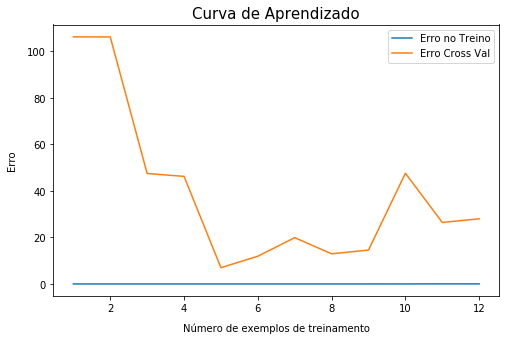

In [91]:
# Plotando curva de aprendizado
error_train, error_cv = plotLearningCurve(X_train_poly, y_train, X_val_poly, y_val, 0)

**Análise do Gráfico**

Com o aumento do número ```m``` de exemplos utilizados no cálculo dos erros, é possível perceber que tanto o custo de treinamento quanto o custo de validação ficam com um **GAP** entre si e que, além disso, o custo obtido para os dados de treinamento está sempre em níveis inferiores. Isto indica que o modelo sofre de um **ALTA VARIÂNCIA** e que as ações abaixo poderiam auxiliar a contornar este problema:
    - Coletar mais dados para o treinamento;
    - Diminuir o set de features do modelo;
    - Aumentar o termo de regularização lambda.

A próxima investigação a ser realizada gira em torno da variação do parâmetro ```lambda``` para verificar como o modelo se comporta.

### Alterando Lambda

#### Lambda = 1

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 25
         Function evaluations: 43
         Gradient evaluations: 43


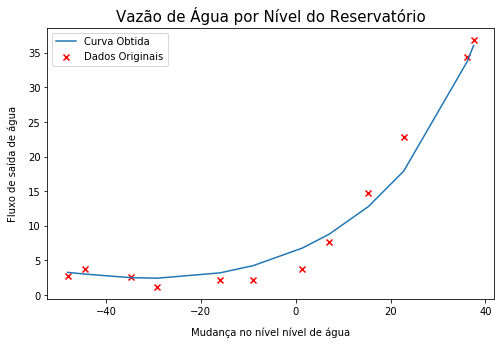

In [74]:
# Antes de iterar a fim de ver o melhor valor de lambda, vamos visualizar dois extremos
lamda = 1
m, n = X_train_poly.shape
theta_inicial = np.ones((n, 1))

# Treinando o modelo
best_theta_lamda1, J_min_lamda1 = trainLinReg(theta_inicial, X_train_poly, y_train, lamda)

# Plotando equação do modelo
plotCurve(best_theta_lamda1, X_train, y_train, X=X_train_poly)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.108491
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 74.611380
         Iterations: 15
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 73.166196
         Iterations: 19
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 59.147974
         Iterations: 13
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 54.236533
         Iterations: 6
         Function evaluations: 14
 

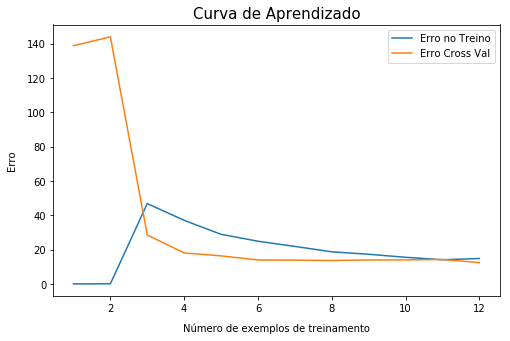

In [92]:
# Plotando curva de aprendizado
error_train_lambda1, error_cv_lambda1 = plotLearningCurve(X_train_poly, y_train, 
                                                          X_val_poly, y_val, lamda)

#### Lambda = 100

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 18
         Gradient evaluations: 18


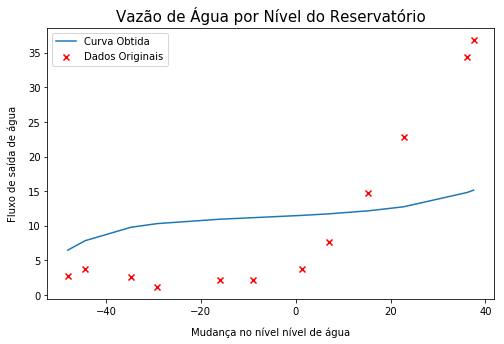

In [76]:
# Antes de iterar a fim de ver o melhor valor de lambda, vamos visualizar dois extremos
lamda = 100
m, n = X_train_poly.shape
theta_inicial = np.ones((n, 1))

# Treinando o modelo
best_theta_lamda100, J_min_lamda100 = trainLinReg(theta_inicial, X_train_poly, 
                                                  y_train, lamda)

# Plotando equação do modelo
plotCurve(best_theta_lamda100, X_train, y_train, X=X_train_poly)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.114717
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 112.255156
         Iterations: 8
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 131.638608
         Iterations: 20
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 116.062526
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 108.778507
         Iterations: 6
         Function evaluations: 13
   

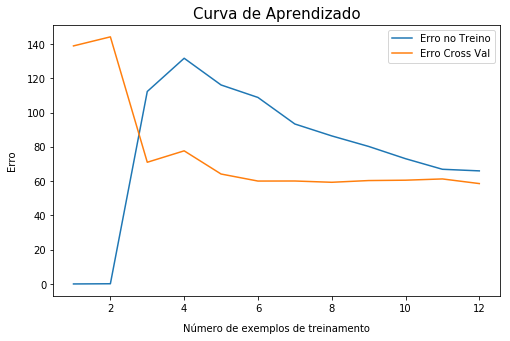

In [77]:
# Plotando curva de aprendizado
error_train_lambda100, error_cv_lambda100 = plotLearningCurve(X_train_poly, y_train, 
                                                              X_val_poly, y_val, lamda)

#### Melhor Lambda

Antes de iniciar a análise, é válido criar uma função que retorne o erro obtido pelos conjuntos de Treino e de Validação para quantificaramos os efeitos causados por alterações nos parâmetros lambda.

In [78]:
# Definindo função para plotar curva de aprendizado
def computeErrors(theta, X_train, y_train, X_val, y_val, lamda):
    

        # Retornando o custo com os parâmetros aprendidos
        J_val = linRegCostFunction(theta_learned.reshape(n, 1), X_val, 
                                   y_val, lamda)
        error_train.append(J_min_train)
        error_cv.append(J_val)
    
    # Plotando dados
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(np.arange(m)+1, error_train, label='Erro no Treino')
    ax.plot(np.arange(m)+1, error_cv, label='Erro Cross Val')
    ax.set_title('Curva de Aprendizado', size=15)
    ax.set_xlabel('Número de exemplos de treinamento', size=10, labelpad=10)
    ax.set_ylabel('Erro', size=10, labelpad=10)
    plt.legend()
    plt.show()
    
    return error_train, error_cv

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [82]:
# Inicializando variáveis
lamdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
m, n = X_train_poly.shape
theta_inicial = np.ones((n, 1))
historic_error_train = []
historic_error_cv = []

# Laço para computar erros
for lamda in lamdas:
    params, cost = trainLinReg(theta_inicial, X_train_poly, y_train, lamda)
    cost_train = linRegCostFunction(params, X_train_poly, y_train, 0)
    cost_val = linRegCostFunction(params, X_val_poly, y_val, 0)
    historic_error_train.append(cost)
    historic_error_cv.append(cost_val)

         Current function value: 0.028892
         Iterations: 1000
         Function evaluations: 1931
         Gradient evaluations: 1931
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 332
         Function evaluations: 657
         Gradient evaluations: 657
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 182
         Function evaluations: 352
         Gradient evaluations: 352
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 212
         Function evaluations: 403
         Gradient evaluations: 403
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 85
         Function evaluations: 162
         Gradient evaluations: 162
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 88
         Function evaluations: 156
         Gradient eval

In [83]:
# Verificando output de treino
historic_error_train

[0.02889245827382454,
 0.16941825467007388,
 0.24317192048460262,
 0.37128249316699646,
 0.6367028628402114,
 1.3605722511697205,
 2.9176493442784506,
 6.830463317314876,
 14.937645806057716,
 31.878154019295778]

In [84]:
# Verificando output de validação
historic_error_cv

[28.00041956356775,
 9.723915283359847,
 14.38952983170852,
 15.065295372447641,
 12.195224447900847,
 8.14993655463634,
 5.378012836530733,
 4.556550193735104,
 4.998840418493758,
 12.436940038042788]